In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [45]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())

In [4]:
df_train = pd.read_csv('../dataset/d_train_20180102.csv',encoding='gbk')
df_test = pd.read_csv('../dataset/d_test_A_20180102.csv',encoding='gbk')

In [33]:
df_train.columns

Index(['id', '性别', '年龄', '体检日期', '*天门冬氨酸氨基转换酶', '*丙氨酸氨基转换酶', '*碱性磷酸酶',
       '*r-谷氨酰基转换酶', '*总蛋白', '白蛋白', '*球蛋白', '白球比例', '甘油三酯', '总胆固醇',
       '高密度脂蛋白胆固醇', '低密度脂蛋白胆固醇', '尿素', '肌酐', '尿酸', '乙肝表面抗原', '乙肝表面抗体', '乙肝e抗原',
       '乙肝e抗体', '乙肝核心抗体', '白细胞计数', '红细胞计数', '血红蛋白', '红细胞压积', '红细胞平均体积',
       '红细胞平均血红蛋白量', '红细胞平均血红蛋白浓度', '红细胞体积分布宽度', '血小板计数', '血小板平均体积',
       '血小板体积分布宽度', '血小板比积', '中性粒细胞%', '淋巴细胞%', '单核细胞%', '嗜酸细胞%', '嗜碱细胞%',
       '血糖'],
      dtype='object')

In [41]:
df_train.shape

(5642, 42)

In [23]:
# df_train['血糖'].describe()

In [24]:
# sns.distplot(df_train['血糖']);

In [ ]:
# Relationship with numerical variables

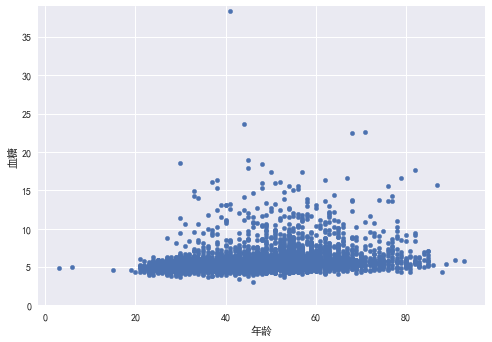

In [46]:
var = '年龄'
data = pd.concat([df_train['血糖'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='血糖', ylim=(0,39));

In [ ]:
# Relationship with categorical features

In [22]:
# #box plot overallqual/saleprice
# var = '血红蛋白'
# data = pd.concat([df_train['血糖'], df_train[var]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x=var, y="血糖", data=data)
# fig.axis(ymin=0, ymax=40);

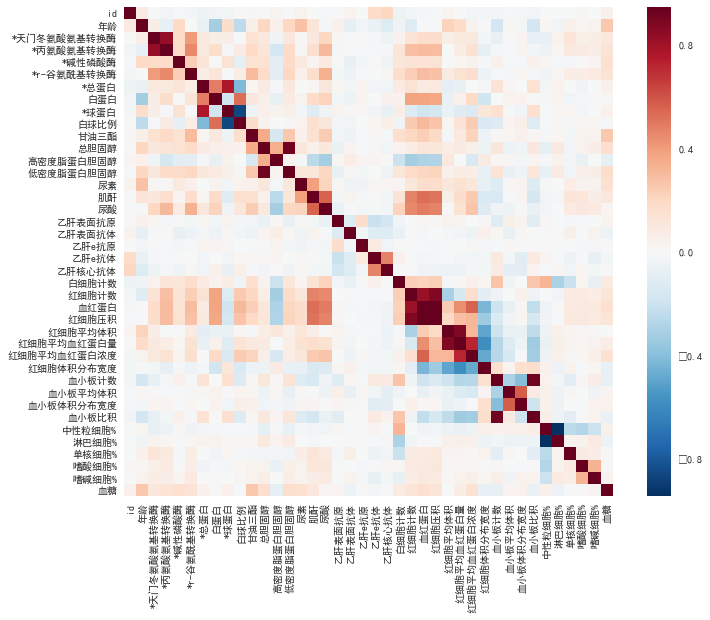

In [49]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [31]:
# #saleprice correlation matrix
# k = 10 #number of variables for heatmap
# cols = corrmat.nlargest(k, '血糖')['血糖'].index
# cm = np.corrcoef(df_train[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [37]:
# #scatterplot
# sns.set()
# cols = ['血糖', '血红蛋白', '乙肝核心抗体', '尿素', '*丙氨酸氨基转换酶', '年龄', '血小板计数']
# sns.pairplot(df_train[cols], size = 2.5)
# plt.show();

In [39]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
乙肝表面抗体,4279,0.758419
乙肝核心抗体,4279,0.758419
乙肝表面抗原,4279,0.758419
乙肝e抗原,4279,0.758419
乙肝e抗体,4279,0.758419
尿酸,1378,0.244240
尿素,1378,0.244240
肌酐,1378,0.244240
*r-谷氨酰基转换酶,1221,0.216413
白球比例,1221,0.216413
